In [1]:
# My Jupyter Lab Notebook, Explore Data Analysis
## Author: Pham Van Thai
### Date: 25, Jan, 2024

## I. Data Overview

In [2]:
# import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from fuzzywuzzy import fuzz

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [4]:
%run utils.ipynb

[nltk_data] Downloading package stopwords to /home/dev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Load the train dataset for processing.
df = pd.read_csv('../Medical-Abstracts-TC-Corpus/medical_tc_train.csv')
df.head()

,condition_label,medical_abstract
0,5,Tissue changes around loose prostheses. A cani...
1,1,Neuropeptide Y and neuron-specific enolase lev...
2,2,"Sexually transmitted diseases of the colon, re..."
3,1,Lipolytic factors associated with murine and h...
4,3,Does carotid restenosis predict an increased r...


In [6]:
# Check for null values in the dataset.
df.medical_abstract.isnull().sum()

0

In [7]:
# Find the total number of class IDs.
df.condition_label.unique()

array([5, 1, 2, 3, 4])

In [8]:
# Modify class IDs such that the first value is 0, and create a mapping with names.
df.condition_label = df.condition_label.apply(lambda x: x-1)

class_mapping = {"0": "Neoplasms",
                 "1": "Digestive system diseases",
                 "2": "Nervous system diseases",
                 "3": "Cardiovascular diseases",
                 "4": "General pathological conditions"}

In [9]:
# Counting all values for each class.
df.condition_label.value_counts()

condition_label
4    3844
0    2530
3    2441
2    1540
1    1195
Name: count, dtype: int64

In [10]:
df.head()

,condition_label,medical_abstract
0,4,Tissue changes around loose prostheses. A cani...
1,0,Neuropeptide Y and neuron-specific enolase lev...
2,1,"Sexually transmitted diseases of the colon, re..."
3,0,Lipolytic factors associated with murine and h...
4,2,Does carotid restenosis predict an increased r...


## II. Explore data analysis.

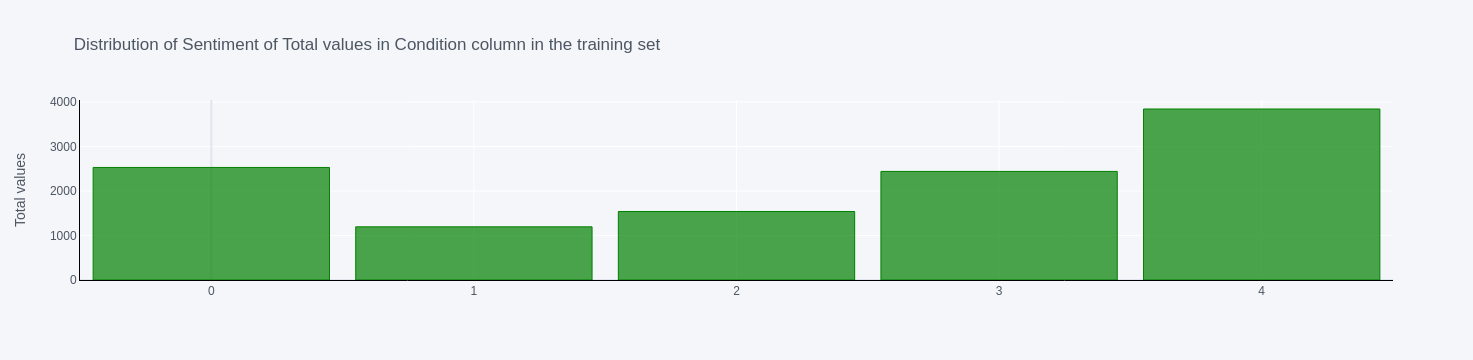

In [11]:
# Show a bar graph to provide an overview of the total data.
df['condition_label'].value_counts(normalize=False).iplot(kind='bar',
                                                        yTitle='Total values', 
                                                        linecolor='black', 
                                                        opacity=0.7,
                                                        color='green',
                                                        theme='pearl',
                                                        bargap=0.1,
                                                        gridcolor='white',
                                                        title='Distribution of Sentiment of Total values in Condition column in the training set')

In [12]:
# Split the DataFrame into separate DataFrames for each class.

df0 = df[df.condition_label==0]
df1 = df[df.condition_label==1]
df2 = df[df.condition_label==2]
df3 = df[df.condition_label==3]
df4 = df[df.condition_label==4]
df0 = df0.reset_index(inplace=False, drop=True)
df1 = df1.reset_index(inplace=False, drop=True)
df2 = df2.reset_index(inplace=False, drop=True)
df3 = df3.reset_index(inplace=False, drop=True)
df4 = df4.reset_index(inplace=False, drop=True)

In [13]:
# View Shape of child df
df0.shape, df1.shape, df2.shape, df3.shape, df4.shape

((2530, 2), (1195, 2), (1540, 2), (2441, 2), (3844, 2))

In [14]:
# Find the index and Jaccard score of two columns within a DataFrame for class 1
# Default Jaccard threshold is 0.8

a_id_df0_1, a_id_df1, j_score0 = data_filter_parallel(df0, df1)

# Find the index and Jaccard score of two columns within a DataFrame for class 1
a_id_df0_2, a_id_df2, j_score1 = data_filter_parallel(df0, df2)

# Find the index and Jaccard score of two columns within a DataFrame for class 1
a_id_df0_3, a_id_df3, j_score2 = data_filter_parallel(df0, df3)

# Find the index and Jaccard score of two columns within a DataFrame for class 1
a_id_df0_4, a_id_df4, j_score3 = data_filter_parallel(df0, df4)

#Find the index and Jaccard score of two columns within a DataFrame for class 2
b_id_df1_1, b_id_df2, j_score4 = data_filter_parallel(df1, df2)

# Find the index and Jaccard score of two columns within a DataFrame for class 2
b_id_df1_2, b_id_df3, j_score5 = data_filter_parallel(df1, df3)

# Find the index and Jaccard score of two columns within a DataFrame for class 2
b_id_df1_3, b_id_df4, j_score6 = data_filter_parallel(df1, df4)

# Find the index and Jaccard score of two columns within a DataFrame for class 3
c_id_df2_1, c_id_df3, j_score7 = data_filter_parallel(df2, df3)

# Find the index and Jaccard score of two columns within a DataFrame for class 3
c_id_df2_2, c_id_df4, j_score8 = data_filter_parallel(df2, df4)

# Find the index and Jaccard score of two columns within a DataFrame for class 4
d_id_df3_1, d_id_df4, j_score9 = data_filter_parallel(df3, df4)

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2441/2441 [02:18<00:00, 17.65it/s]


In [15]:
# Check if all values of the Jaccard score are the same.
check_replace_values(j_score0)

Is all the same : True 	 Total values:  125


In [16]:
check_replace_values(j_score1)

Is all the same : True 	 Total values:  126


In [17]:
check_replace_values(j_score2)

Is all the same : True 	 Total values:  69


In [18]:
check_replace_values(j_score3)

Is all the same : True 	 Total values:  396


In [19]:
check_replace_values(j_score4)

Is all the same : True 	 Total values:  36


In [20]:
check_replace_values(j_score5)

Is all the same : True 	 Total values:  43


In [21]:
check_replace_values(j_score6)

Is all the same : True 	 Total values:  376


In [22]:
check_replace_values(j_score7)

Is the same : False 	 Other values 1:  [0.98947368]


In [23]:
check_replace_values(j_score8)

Is all the same : True 	 Total values:  401


In [24]:
check_replace_values(j_score9)

Is all the same : True 	 Total values:  550


In [25]:
# Display all identical IDs and the count of unique IDs after removing duplicates.

total_id0 = np.concatenate((a_id_df0_1, a_id_df0_2, a_id_df0_3, a_id_df0_4))
len(total_id0), len(np.unique(total_id0))

(716, 640)

In [26]:
total_id1 = np.concatenate((b_id_df1_1, b_id_df1_2, b_id_df1_3))
len(total_id1), len(np.unique(total_id1))

(455, 422)

In [27]:
total_id2 = np.concatenate((c_id_df2_1, c_id_df2_2))
len(total_id2), len(np.unique(total_id2))

(537, 493)

In [28]:
total_id3 = d_id_df3_1
len(total_id3), len(np.unique(total_id3))

(550, 550)

### Multi-Labeling Concept
* In medical data, there are many cases where doctors or patient information may not be clear,
leading to the same text content belonging to multiple different disease groups.</br>
* To analyze more deeply, below, we will delve into what is called multi-labeling in the data.

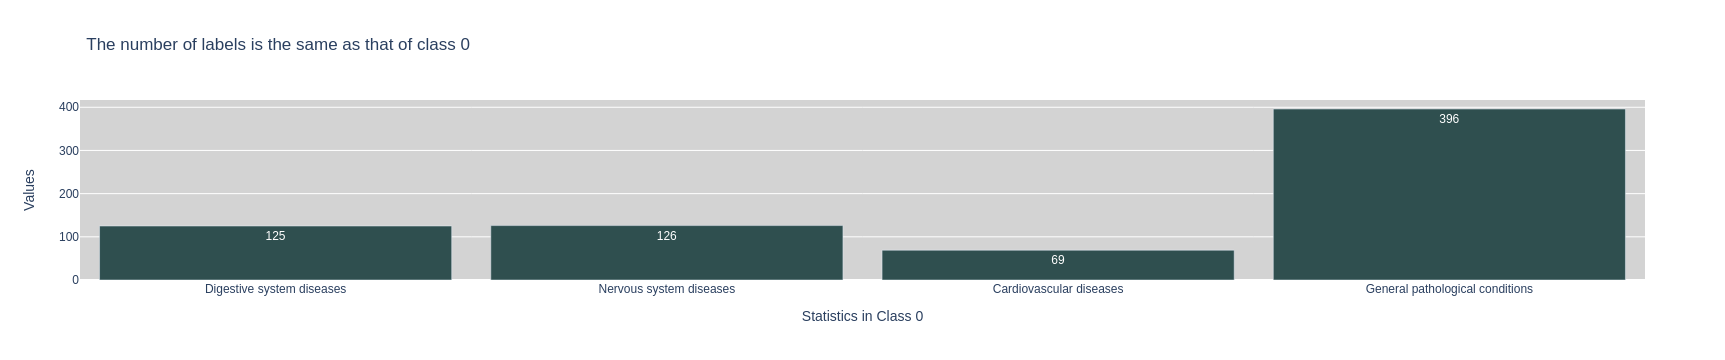

In [29]:
# Show the number of duplicate data of Class 0 compared to the remaining classes

labels = list(class_mapping.values())
labels.remove(labels[0])
values = [len(a_id_df1), len(a_id_df2), len(a_id_df3), len(a_id_df4)]

visualize_multilabel(labels,
                     values,
                     title='The number of labels is the same as that of class 0',
                     x_title='Statistics in Class 0'
                    )

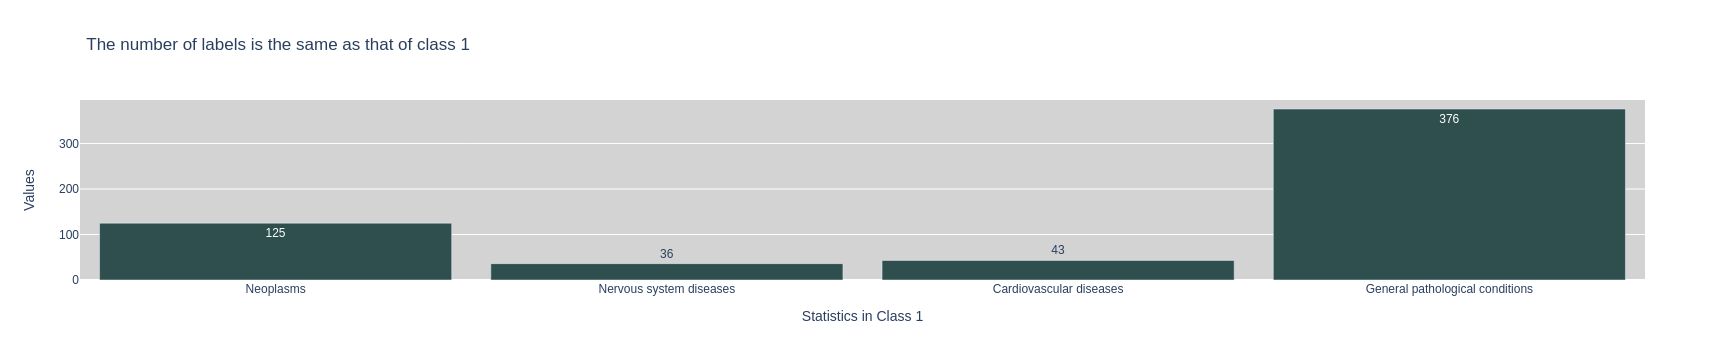

In [30]:
# Show the number of duplicate data of Class 1 compared to the remaining classes

labels = list(class_mapping.values())
labels.remove(labels[1])
values = [len(a_id_df0_1), len(b_id_df2), len(b_id_df3), len(b_id_df4)]

visualize_multilabel(labels,
                     values,
                     title='The number of labels is the same as that of class 1',
                     x_title='Statistics in Class 1'
                    )

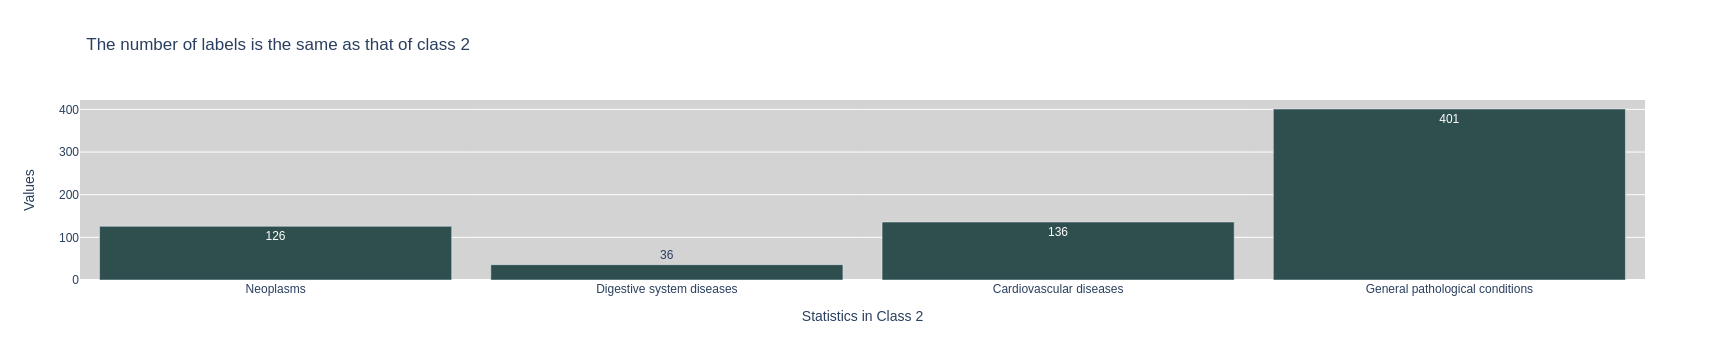

In [31]:
# Show the number of duplicate data of Class 2 compared to the remaining classes

labels = list(class_mapping.values())
labels.remove(labels[2])
values = [len(a_id_df0_2), len(b_id_df1_1), len(c_id_df3), len(c_id_df4)]

visualize_multilabel(labels,
                     values,
                     title='The number of labels is the same as that of class 2',
                     x_title='Statistics in Class 2'
                    )

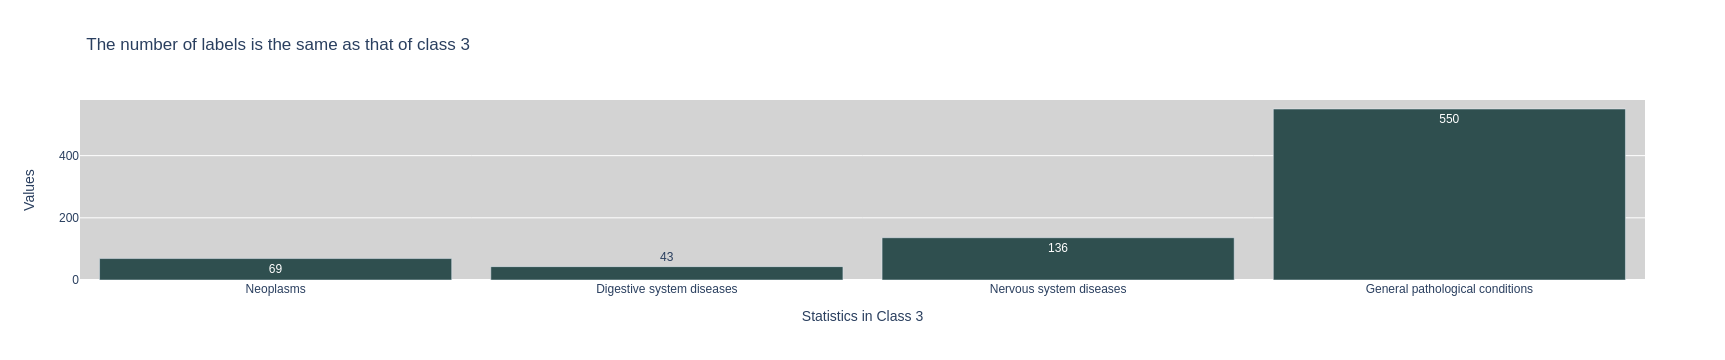

In [32]:
# Show the number of duplicate data of Class 3 compared to the remaining classes

labels = list(class_mapping.values())
labels.remove(labels[3])
values = [len(a_id_df0_3), len(b_id_df1_2), len(c_id_df2_1), len(d_id_df4)]

visualize_multilabel(labels,
                     values,
                     title='The number of labels is the same as that of class 3',
                     x_title='Statistics in Class 3'
                    )

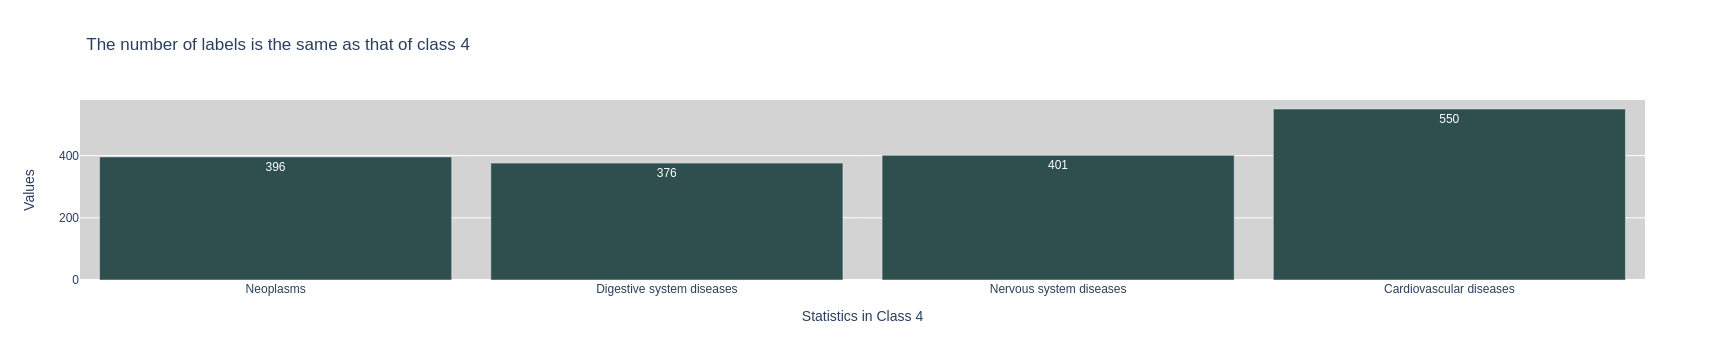

In [33]:
# Show the number of duplicate data of Class 4 compared to the remaining classes

labels = list(class_mapping.values())
labels.remove(labels[4])
values = [len(a_id_df0_4), len(b_id_df1_3), len(c_id_df2_2), len(d_id_df3_1)]

visualize_multilabel(labels,
                     values,
                     title='The number of labels is the same as that of class 4',
                     x_title='Statistics in Class 4'
                    )

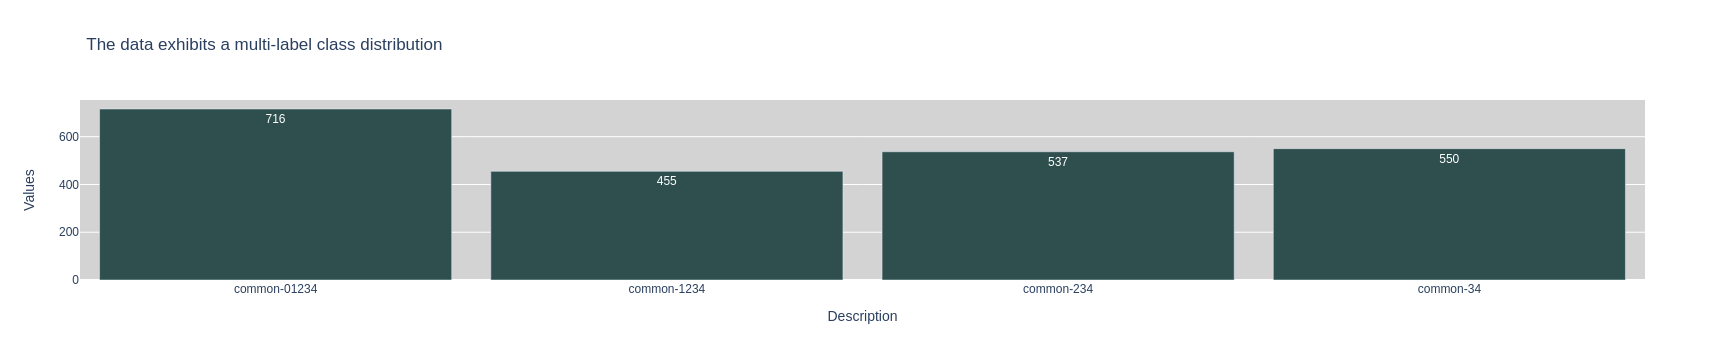

In [34]:
# Displays data in groups of overlapping data and is multi-labeled

labels = ['common-01234', 'common-1234', 'common-234', 'common-34']
values = [len(total_id0), len(total_id1), len(total_id2), len(total_id3)]
title='The data exhibits a multi-label class distribution'

visualize_multilabel(labels, values, title=title)

In [35]:
# Filter out unique indexes that are multi-label data.

rep_df0 = df0.iloc[np.unique(total_id0)]
rep_df1 = df0.iloc[np.unique(total_id1)]
rep_df2 = df0.iloc[np.unique(total_id2)]
rep_df3 = df0.iloc[np.unique(total_id3)]

In [36]:
# Create rep_df include all of multi-labeled

rep_df = pd.concat([rep_df0, rep_df1, rep_df2, rep_df3], ignore_index=True)
rep_df = rep_df[['medical_abstract']]
rep_df.shape

(2105, 1)

In [37]:
rep_df.drop_duplicates(inplace=True)
rep_df.head()

,medical_abstract
0,Lipolytic factors associated with murine and h...
1,Dilatation in the duplex kidney: 3 unusual cas...
2,Observations on the pathophysiology of Nelson'...
3,Angiotropic intravascular large-cell lymphoma ...
4,Soluble histocompatibility antigen class I in ...


In [38]:
rep_df.shape

(1523, 1)

### Data processing
* In medical datasets, specific unit symbols and special characters are crucial for predicting disease stage and condition.</br>
* However, they may not be necessary for disease group classification.</br>
* Therefore, preprocessing will remove some less important characters such as: [&, $, !, ?, (, ), [, ], ", ', =, :, `] and lowercase all text.

#### Special Charecters

In [39]:
df = normalize_special_text(df, 'medical_abstract', 'normalize_medical_abstract')
df.head()

,condition_label,medical_abstract,normalize_medical_abstract
0,4,Tissue changes around loose prostheses. A cani...,tissue changes around loose prostheses a canin...
1,0,Neuropeptide Y and neuron-specific enolase lev...,neuropeptide y and neuron specific enolase lev...
2,1,"Sexually transmitted diseases of the colon, re...",sexually transmitted diseases of the colon rec...
3,0,Lipolytic factors associated with murine and h...,lipolytic factors associated with murine and h...
4,2,Does carotid restenosis predict an increased r...,does carotid restenosis predict an increased r...


#### Remove Stop Words

* In general text classification tasks, including medical text classification,
* stop words such as [the, and, a, an, ...] are typically considered to have little value in improving accuracy.
* On the contrary, keeping these stop words increases the number of tokens while reducing the information conveyed by specialized terms.

In [40]:
df = remove_stopwords(df, 'normalize_medical_abstract')
df.head()

,condition_label,medical_abstract,normalize_medical_abstract
0,4,Tissue changes around loose prostheses. A cani...,tissue changes around loose prostheses canine ...
1,0,Neuropeptide Y and neuron-specific enolase lev...,neuropeptide neuron specific enolase levels be...
2,1,"Sexually transmitted diseases of the colon, re...",sexually transmitted diseases colon rectum anu...
3,0,Lipolytic factors associated with murine and h...,lipolytic factors associated murine human canc...
4,2,Does carotid restenosis predict an increased r...,carotid restenosis predict increased risk late...


#### Vocabulary analysis

__Analyzing the number of vocabulary can show:__
* range of word count distribution
* Number of vocabulary each class possesses
* Frequency of words used in each class
* The degree of relatedness of vocabulary between classes

In [41]:
# Counting the number of words in each row

In [42]:
df['word_count'] = df.normalize_medical_abstract.apply(lambda x: len(x.split()))
df.head()

,condition_label,medical_abstract,normalize_medical_abstract,word_count
0,4,Tissue changes around loose prostheses. A cani...,tissue changes around loose prostheses canine ...,92
1,0,Neuropeptide Y and neuron-specific enolase lev...,neuropeptide neuron specific enolase levels be...,112
2,1,"Sexually transmitted diseases of the colon, re...",sexually transmitted diseases colon rectum anu...,157
3,0,Lipolytic factors associated with murine and h...,lipolytic factors associated murine human canc...,99
4,2,Does carotid restenosis predict an increased r...,carotid restenosis predict increased risk late...,153


In [43]:
# Show the barplot to see overview of Vocabulary of Frequency

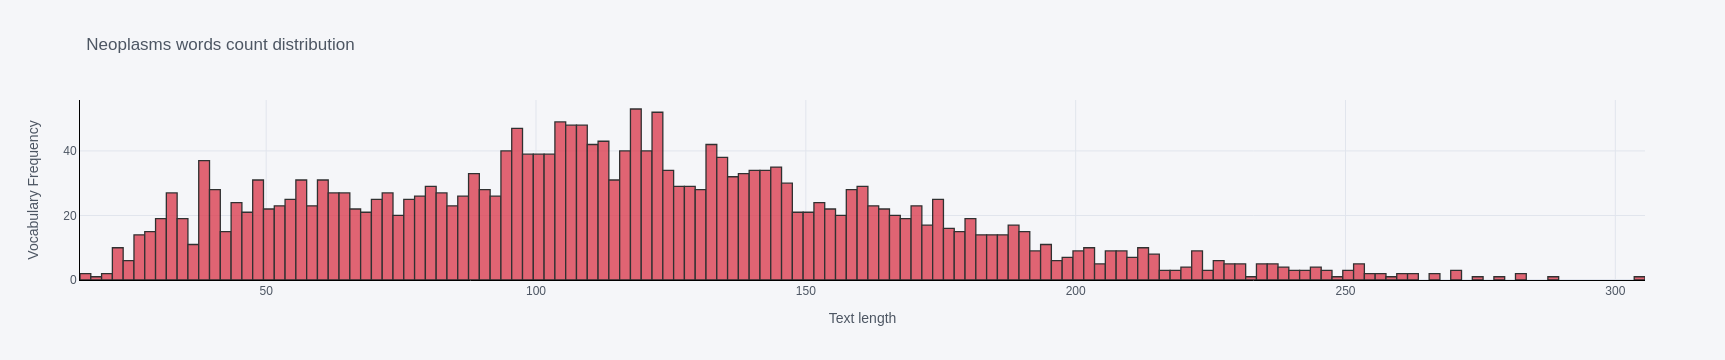

Max word count for Neoplasms: 305
Min word count for Neoplasms: 16


In [44]:
show_wordCount(df, 0, 'Neoplasms')

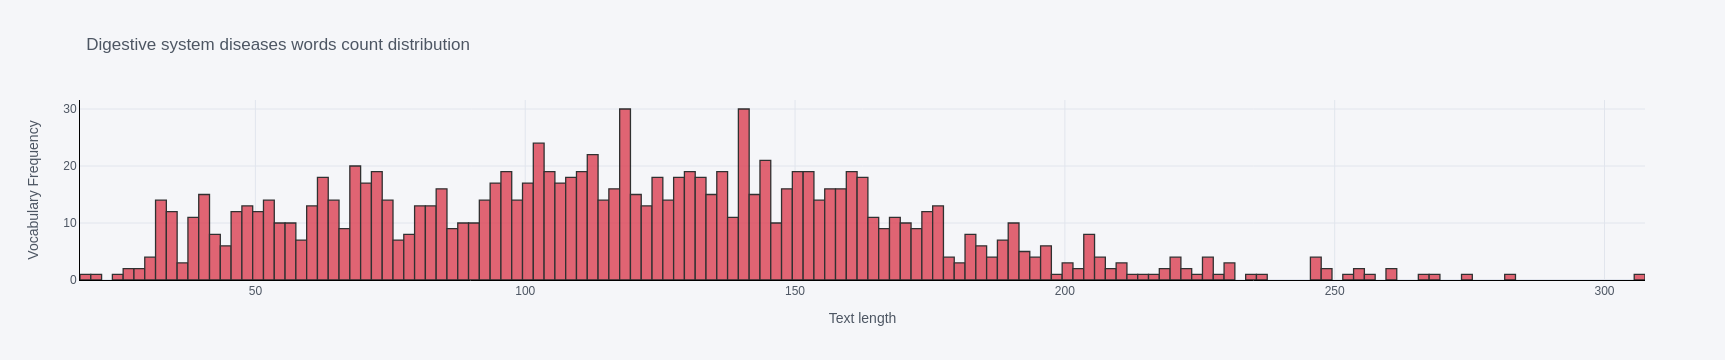

Max word count for Digestive system diseases: 307
Min word count for Digestive system diseases: 18


In [45]:
show_wordCount(df, 1, 'Digestive system diseases')

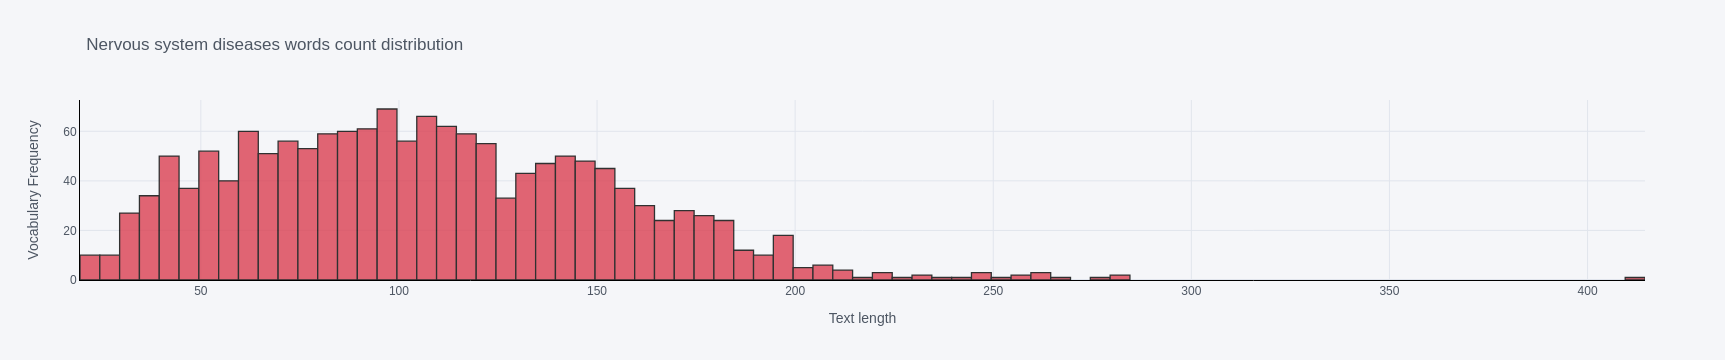

Max word count for Nervous system diseases: 413
Min word count for Nervous system diseases: 20


In [46]:
show_wordCount(df, 2, 'Nervous system diseases')

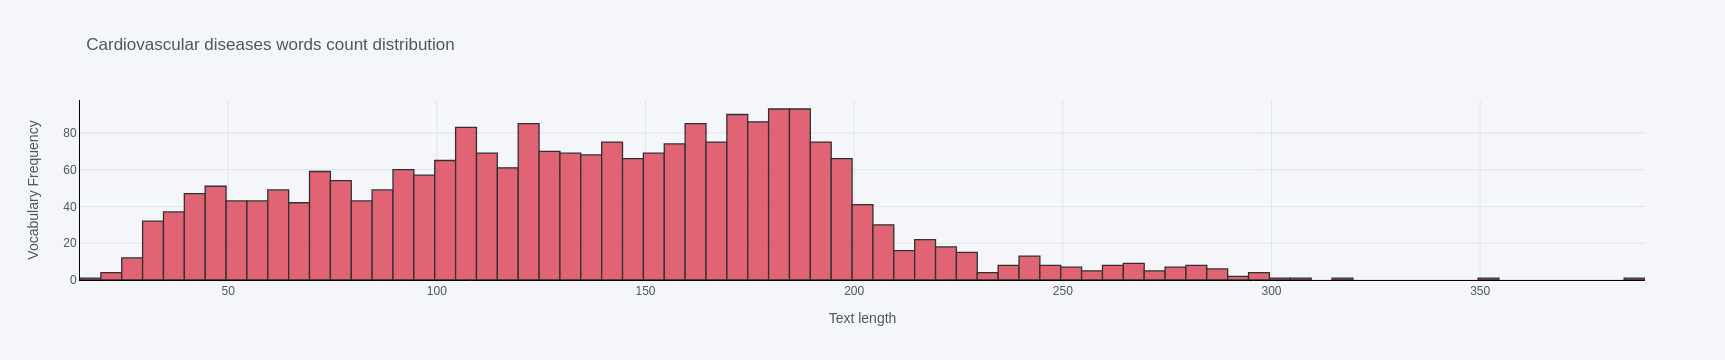

Max word count for Cardiovascular diseases: 389
Min word count for Cardiovascular diseases: 18


In [47]:
show_wordCount(df, 3, 'Cardiovascular diseases')

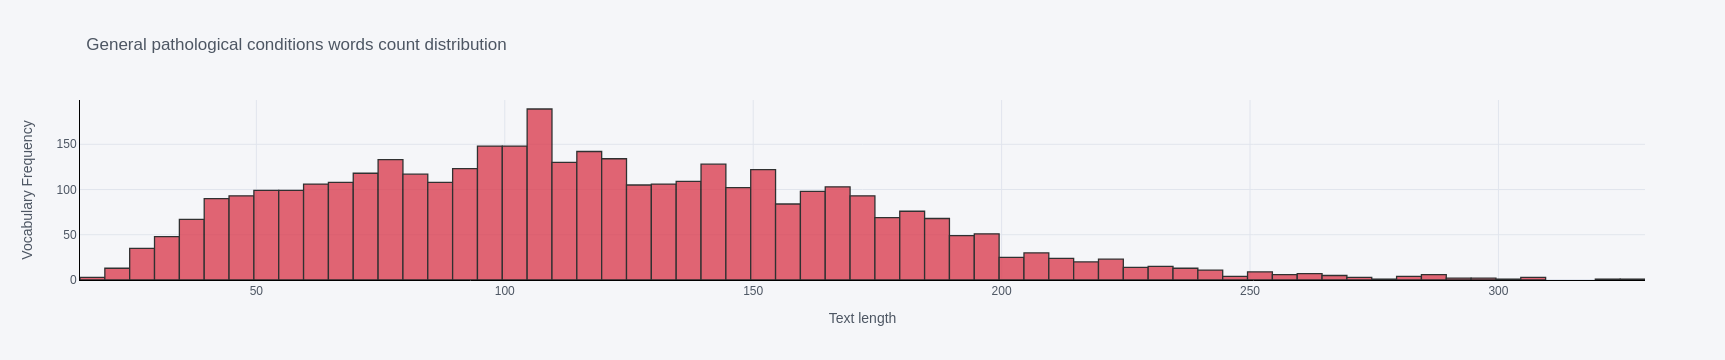

Max word count for General pathological conditions: 327
Min word count for General pathological conditions: 16


In [48]:
show_wordCount(df, 4, 'General pathological conditions')

* Analyzing the number of words in sentences for each disease group to determine the maximum number of tokens when initializing the model</br>
_The specific charts above show the distribution of the number of words for each class as follows:_ </br>
&emsp; ***Class 0-Neoplasms***: The distribution of data with the most common frequency is between 60-170 words. **The highest is 305 and the lowest is 16.**</br>
&emsp; ***Class 1-Digestive system diseases***: The distribution of data with the most common frequency is between 60-170 words. **The highest is 307 and the lowest is 18.**</br>
&emsp; ***Class 2-Nervous system diseases***: The distribution of data with the most common frequency is between 35-170 words. **The highest is 413 and the lowest is 20.**</br>
&emsp; ***Class 3-Cardiovascular diseases***: The distribution of data with the most common frequency is between 40-200 words. **The highest is 389 and the lowest is 18.**</br>
&emsp; ***Class 4-general pathological conditions***: The distribution of data with the most common frequency is between 40-190 words. **The highest is 327 and the lowest is 14.**

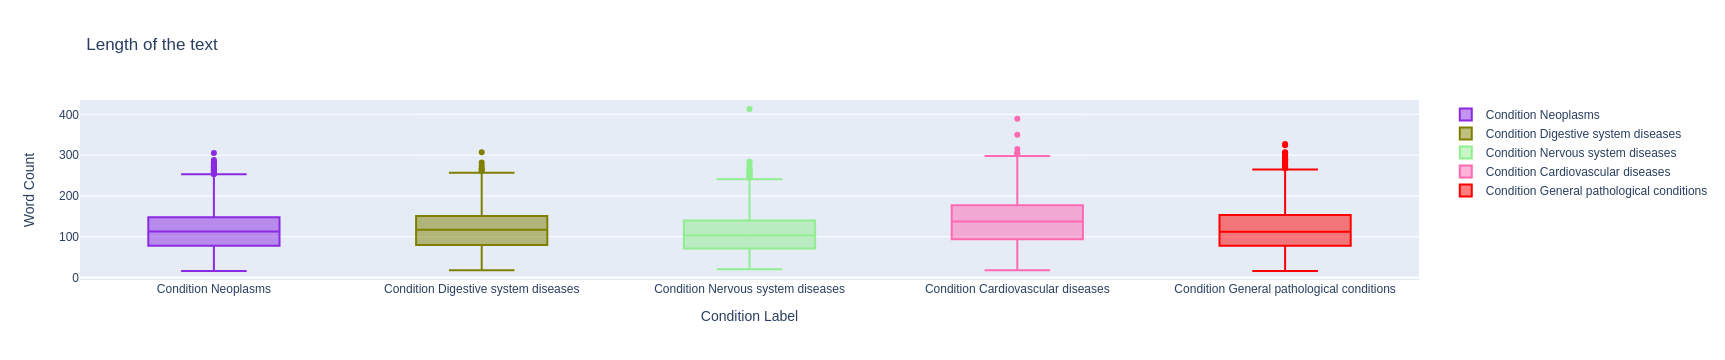

In [49]:
get_quartile_range(df, 'word_count', [0,1,2,3,4])

```
* Based on the quartile plots, it canBased on the quartile plots,
  it can be observed that the medians of the classes are very close to each other,
  ranging from 104 to 135. This indicates that the data in each class is relatively evenly distributed.
* The 25th-75th percentiles of the 4 classes also do not have a large difference be observed that the medians of the classes are very close to each other [104-135].
* The 25th-75th percentiles of the 4 classes do not have a large difference.
```

In [50]:
df.head()

,condition_label,medical_abstract,normalize_medical_abstract,word_count
0,4,Tissue changes around loose prostheses. A cani...,tissue changes around loose prostheses canine ...,92
1,0,Neuropeptide Y and neuron-specific enolase lev...,neuropeptide neuron specific enolase levels be...,112
2,1,"Sexually transmitted diseases of the colon, re...",sexually transmitted diseases colon rectum anu...,157
3,0,Lipolytic factors associated with murine and h...,lipolytic factors associated murine human canc...,99
4,2,Does carotid restenosis predict an increased r...,carotid restenosis predict increased risk late...,153


#### Visualizer for the top 20 most frequently occurring words of each class.

In [51]:
top_0 = get_top_n_words(df[df.condition_label==0], cols='normalize_medical_abstract', n=50)

In [52]:
top_1 = get_top_n_words(df[df.condition_label==1], cols='normalize_medical_abstract', n=50)

In [53]:
top_2 = get_top_n_words(df[df.condition_label==2], cols='normalize_medical_abstract', n=50)

In [54]:
top_3 = get_top_n_words(df[df.condition_label==3], cols='normalize_medical_abstract', n=50)

In [55]:
top_4 = get_top_n_words(df[df.condition_label==4], cols='normalize_medical_abstract', n=50)

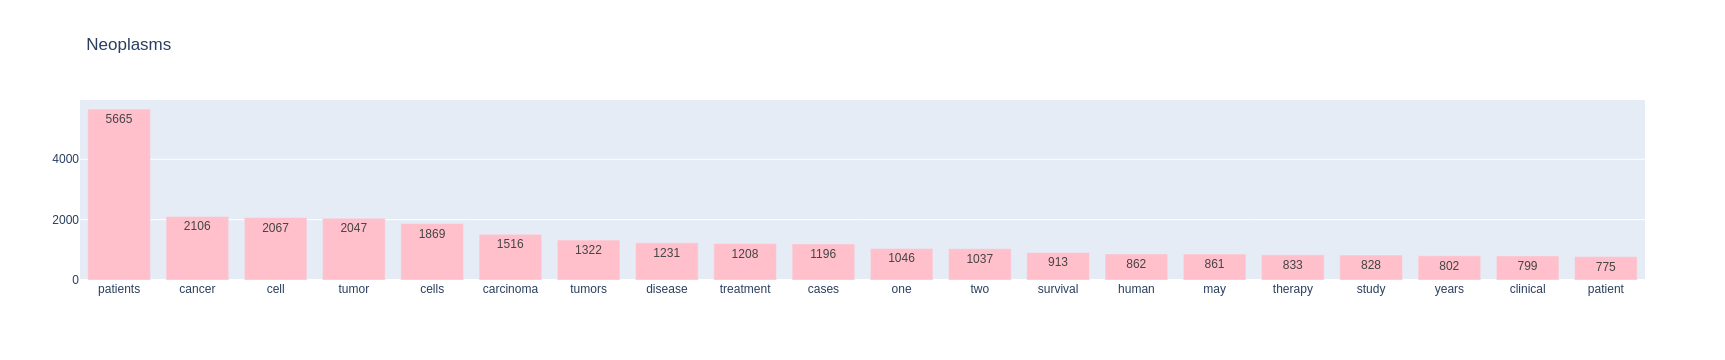

In [56]:
words, frequencies = zip(*top_0)
fig = visualization_top_word_count(words, frequencies, frequencies, title='Neoplasms', color='pink', top_n=20)
fig.show()

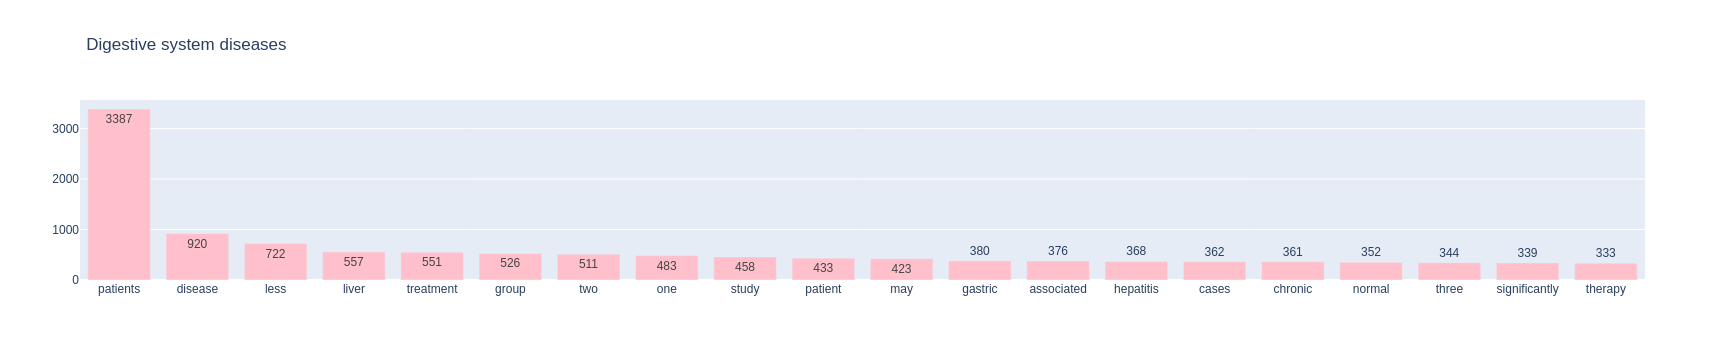

In [57]:
words, frequencies = zip(*top_1)
fig = visualization_top_word_count(words, frequencies, frequencies, title='Digestive system diseases', color='pink', top_n=20)
fig.show()

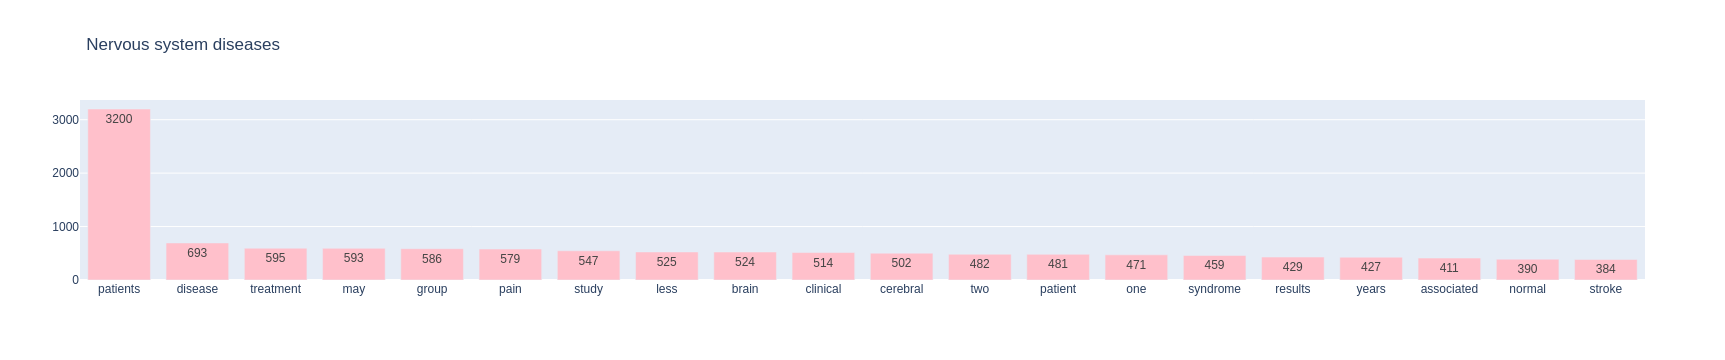

In [58]:
words, frequencies = zip(*top_2)
fig = visualization_top_word_count(words, frequencies, frequencies, title='Nervous system diseases', color='pink', top_n=20)
fig.show()

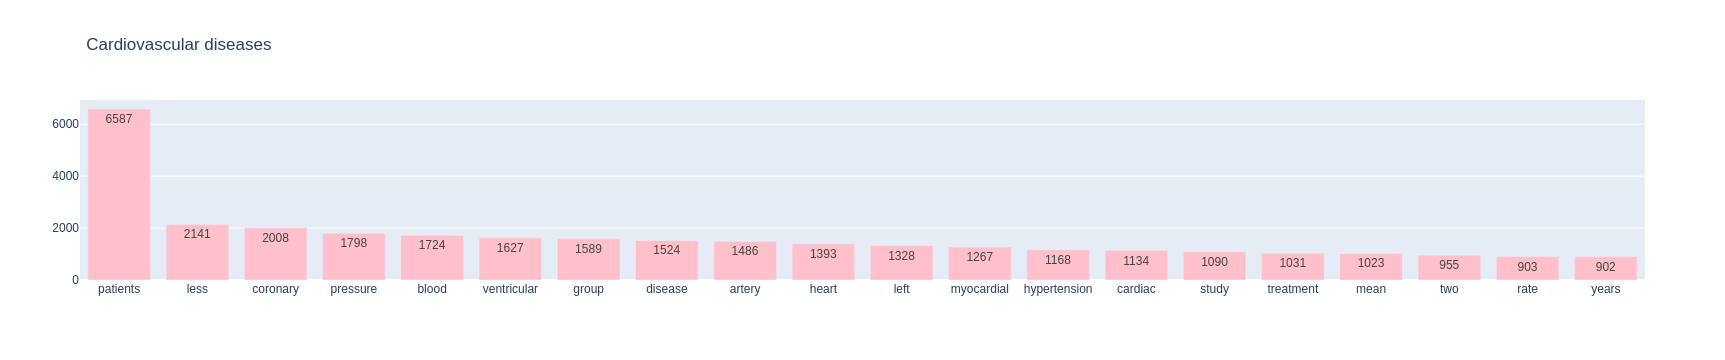

In [59]:
words, frequencies = zip(*top_3)
fig = visualization_top_word_count(words, frequencies, frequencies, title='Cardiovascular diseases', color='pink', top_n=20)
fig.show()

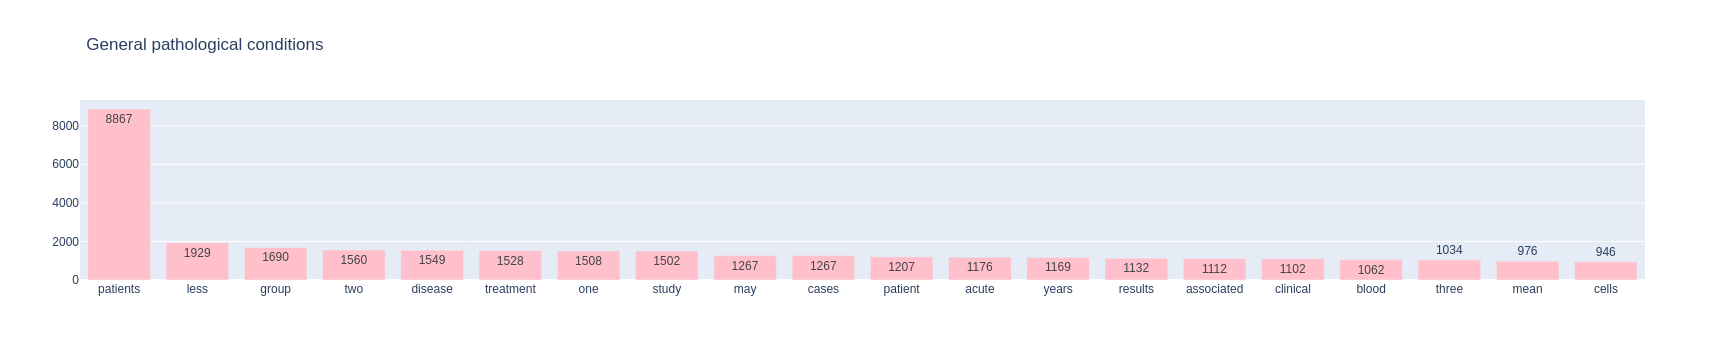

In [60]:
words, frequencies = zip(*top_4)
fig = visualization_top_word_count(words, frequencies, frequencies, title='General pathological conditions', color='pink', top_n=20)
fig.show()

* There is a peculiar aspect where words such as 'patients' and 'patient' (along with many others) both refer to a group of individuals but are considered as distinct words. 
* The major distinction lies in how sentences are structured in singular or plural form, and this could potentially impact text classification if not normalized to the base form 'patient'.

### Stemming and Lemmatization

In [61]:
# Apply stemming to the 'normalize_medical_abstract' column and create a new column
# 'stemming_normalize_medical_abstract' containing the preprocessed text with stemming.
df['stemming_normalize_medical_abstract'] = df['normalize_medical_abstract'].apply(lambda x: stemming_lemma_reprocess(x, type_select='stemming'))

# Apply lemmatization to the 'normalize_medical_abstract' column and create a new column
# 'lemma_normalize_medical_abstract' containing the preprocessed text with lemmatization.
df['lemma_normalize_medical_abstract'] = df['normalize_medical_abstract'].apply(lambda x: stemming_lemma_reprocess(x, type_select='lemma'))

df.head()

,condition_label,medical_abstract,normalize_medical_abstract,word_count,stemming_normalize_medical_abstract,lemma_normalize_medical_abstract
0,4,Tissue changes around loose prostheses. A cani...,tissue changes around loose prostheses canine ...,92,tissu chang around loos prosthes canin model i...,tissue change around loose prosthesis canine m...
1,0,Neuropeptide Y and neuron-specific enolase lev...,neuropeptide neuron specific enolase levels be...,112,neuropeptid neuron specif enolas level benign ...,neuropeptide neuron specific enolase level ben...
2,1,"Sexually transmitted diseases of the colon, re...",sexually transmitted diseases colon rectum anu...,157,sexual transmit diseas colon rectum anu challe...,sexually transmitted disease colon rectum anus...
3,0,Lipolytic factors associated with murine and h...,lipolytic factors associated murine human canc...,99,lipolyt factor associ murin human cancer cache...,lipolytic factor associated murine human cance...
4,2,Does carotid restenosis predict an increased r...,carotid restenosis predict increased risk late...,153,carotid restenosi predict increas risk late sy...,carotid restenosis predict increased risk late...


In [62]:
# Show text after processed with Stemming
df.stemming_normalize_medical_abstract.iloc[10]

'sodium sensit sodium retain hypertens differ sodium sensit sodium retain hypertens theoret consid use water tank model bodi fluid volum blood pressur regul outlet valv attach tank base area correspond reciproc total peripher resist tpr water pour tank rate correspond amount na+ intak equilibrium achiev certain water level volum output outlet repres mean arteri pressur map cardiac output co urinari na+ excret height outlet tank bottom size cross section area outlet correspond x intercept slope renal function pressur natriuresi curv respect nonsodium sensit hypertens due shift curv toward higher blood pressur level elev height outlet without chang slope size outlet sodium sensit hypertens due depress slope curv reduc outlet size map water level also co water volum increas result sodium retain hypertens tpr reciproc base area remain unchang co rel unchang result nonsodium retain hypertens tpr elev thu map sensit sodium intak determin renal function curv sinc bodi fluid volum determin ren

In [63]:
# Show text after processed with Lemmatization
df.lemma_normalize_medical_abstract.iloc[10]

'sodium sensitive sodium retaining hypertension difference sodium sensitive sodium retaining hypertension theoretically considered using water tank model body fluid volume blood pressure regulation outlet valve attached tank base area corresponding reciprocal total peripheral resistance tpr water poured tank rate corresponding amount na+ intake equilibrium achieved certain water level volume output outlet represent mean arterial pressure map cardiac output co urinary na+ excretion height outlet tank bottom size cross sectional area outlet correspond x intercept slope renal function pressure natriuresis curve respectively nonsodium sensitive hypertension due shift curve toward higher blood pressure level elevated height outlet without change slope size outlet sodium sensitive hypertension due depressed slope curve reduced outlet size map water level also co water volume increased resulting sodium retaining hypertension tpr reciprocal base area remained unchanged co relatively unchanged 

#### Preliminary vision
* It can be observed that the Lemmatizer operates more accurately in accordance with the requirements of text processing,
even though Pre-trained BERT models trained on medical text data can also handle the issue of word diversity.
* However, the Lemmatizer helps simplify the vocabulary without truncating or condensing words, as in the case of Stemming.

In [64]:
# Create lemmatization and stemming processing

In [65]:
top_0_lemma = get_top_n_words(df[df.condition_label==0], cols='lemma_normalize_medical_abstract', n=50)
top_0_stemming = get_top_n_words(df[df.condition_label==0], cols='stemming_normalize_medical_abstract', n=50)

In [66]:
top_1_lemma = get_top_n_words(df[df.condition_label==1], cols='lemma_normalize_medical_abstract', n=50)
top_1_stemming = get_top_n_words(df[df.condition_label==1], cols='stemming_normalize_medical_abstract', n=50)

In [67]:
top_2_lemma = get_top_n_words(df[df.condition_label==2], cols='lemma_normalize_medical_abstract', n=50)
top_2_stemming = get_top_n_words(df[df.condition_label==2], cols='stemming_normalize_medical_abstract', n=50)

In [68]:
top_3_lemma = get_top_n_words(df[df.condition_label==3], cols='lemma_normalize_medical_abstract', n=50)
top_3_stemming = get_top_n_words(df[df.condition_label==3], cols='stemming_normalize_medical_abstract', n=50)

In [69]:
top_4_lemma = get_top_n_words(df[df.condition_label==4], cols='lemma_normalize_medical_abstract', n=50)
top_4_stemming = get_top_n_words(df[df.condition_label==4], cols='stemming_normalize_medical_abstract', n=50)

In [70]:
# Show top words with Lemmatization

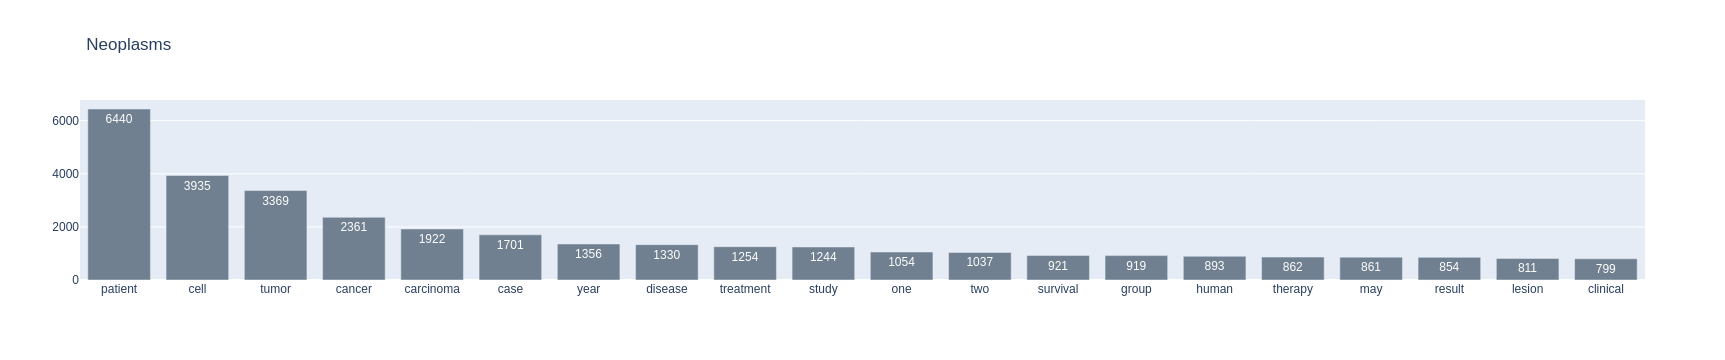

In [71]:
words, frequencies = zip(*top_0_lemma)
fig = visualization_top_word_count(words, frequencies, frequencies, title='Neoplasms', color='slategrey', top_n=20)
fig.show()

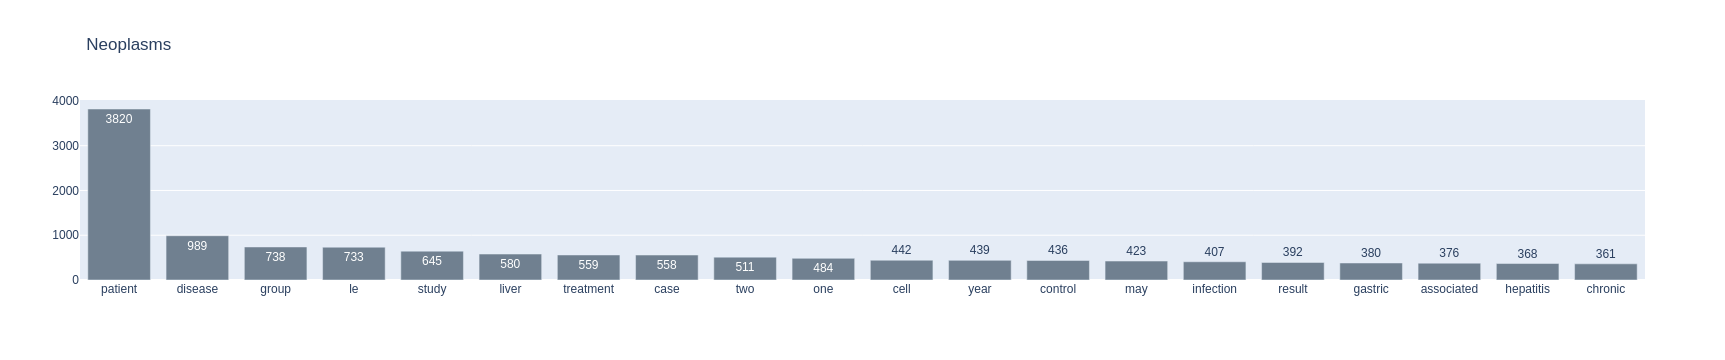

In [72]:
words, frequencies = zip(*top_1_lemma)
fig = visualization_top_word_count(words, frequencies, frequencies, title='Neoplasms', color='slategrey', top_n=20)
fig.show()

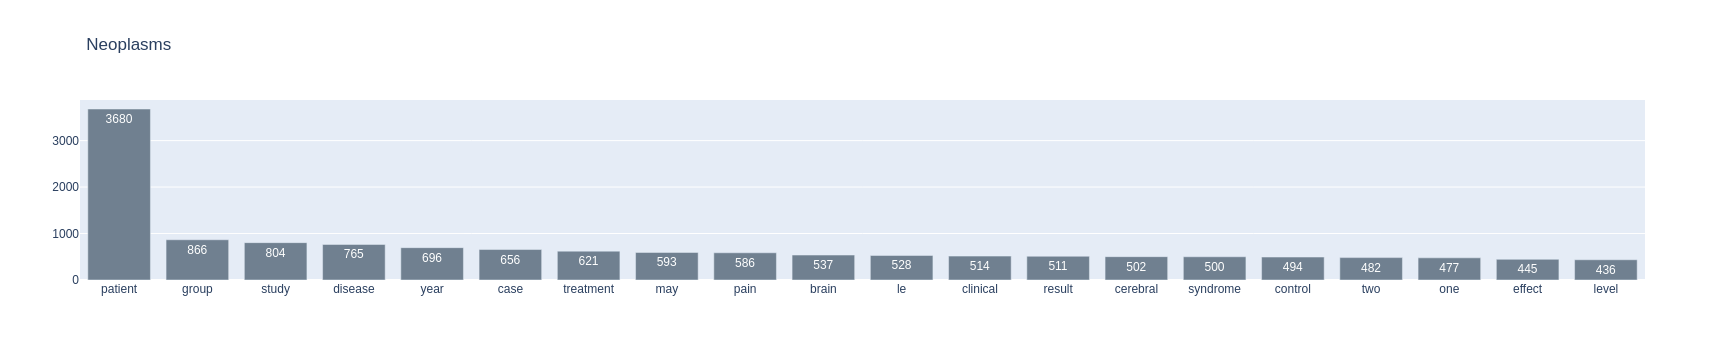

In [73]:
words, frequencies = zip(*top_2_lemma)
fig = visualization_top_word_count(words, frequencies, frequencies, title='Neoplasms', color='slategrey', top_n=20)
fig.show()

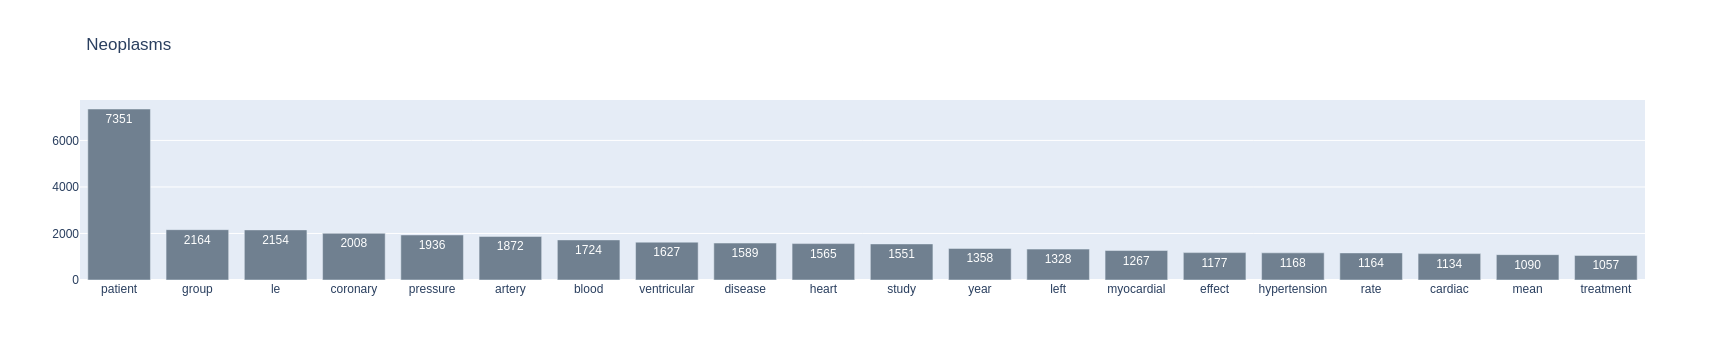

In [74]:
words, frequencies = zip(*top_3_lemma)
fig = visualization_top_word_count(words, frequencies, frequencies, title='Neoplasms', color='slategrey', top_n=20)
fig.show()

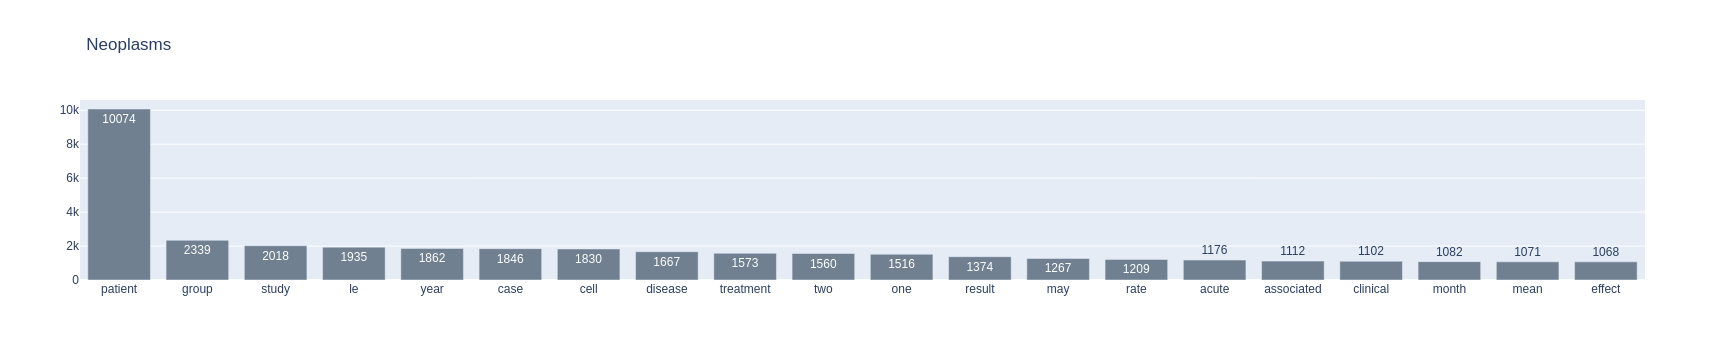

In [75]:
words, frequencies = zip(*top_4_lemma)
fig = visualization_top_word_count(words, frequencies, frequencies, title='Neoplasms', color='slategrey', top_n=20)
fig.show()

* 'patients' and 'patient' have been standardized

In [76]:
# Show top words with Stemming

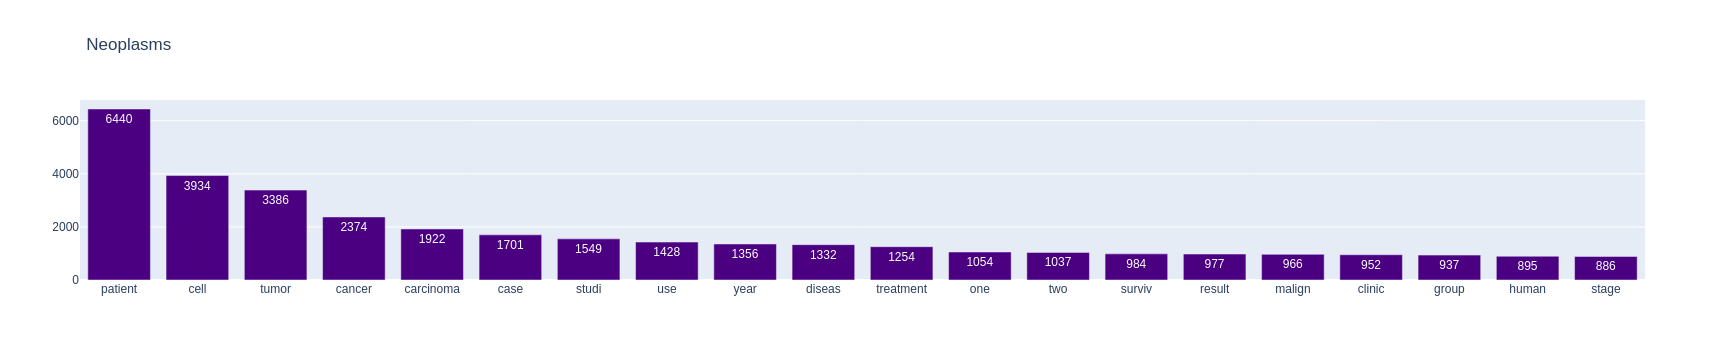

In [77]:
words, frequencies = zip(*top_0_stemming)
fig = visualization_top_word_count(words, frequencies, frequencies, title='Neoplasms', color='indigo', top_n=20)
fig.show()

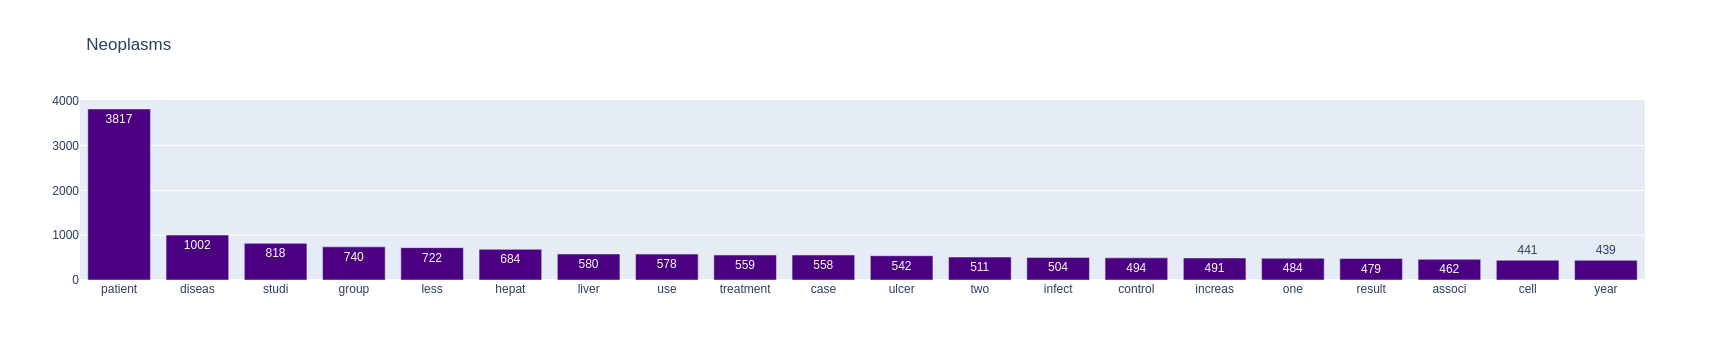

In [78]:
words, frequencies = zip(*top_1_stemming)
fig = visualization_top_word_count(words, frequencies, frequencies, title='Neoplasms', color='indigo', top_n=20)
fig.show()

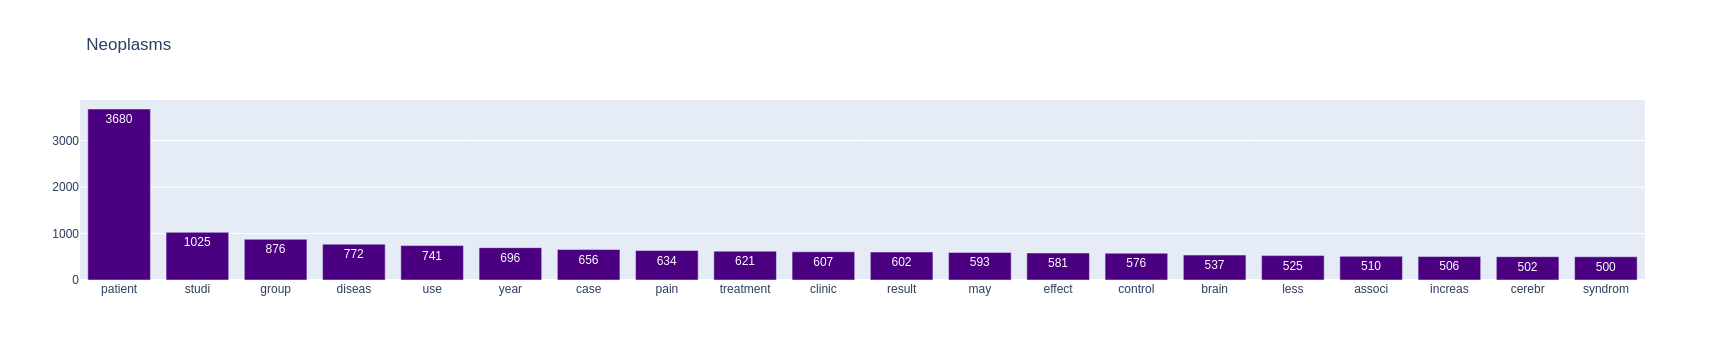

In [79]:
words, frequencies = zip(*top_2_stemming)
fig = visualization_top_word_count(words, frequencies, frequencies, title='Neoplasms', color='indigo', top_n=20)
fig.show()

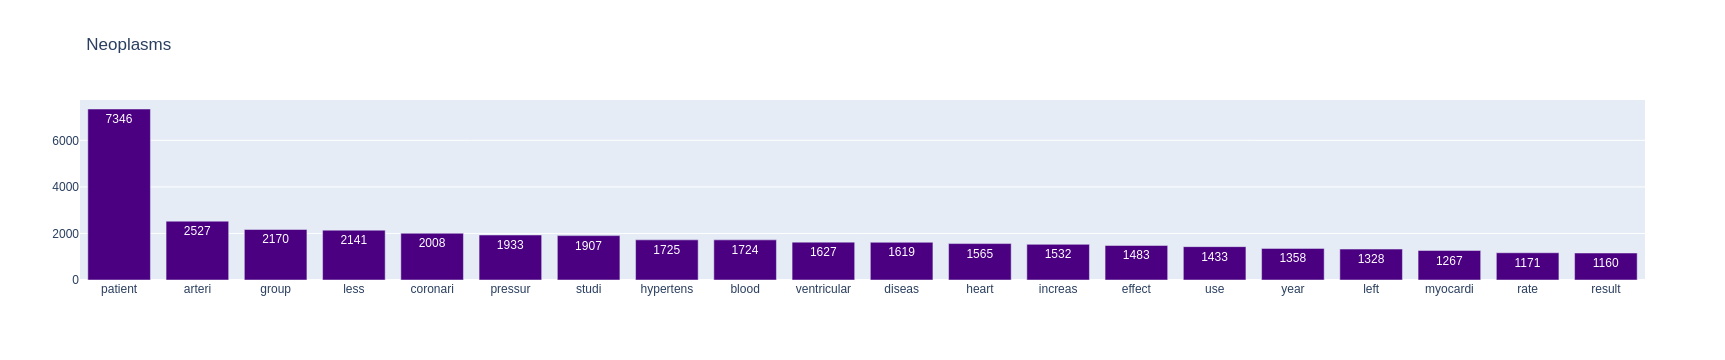

In [80]:
words, frequencies = zip(*top_3_stemming)
fig = visualization_top_word_count(words, frequencies, frequencies, title='Neoplasms', color='indigo', top_n=20)
fig.show()

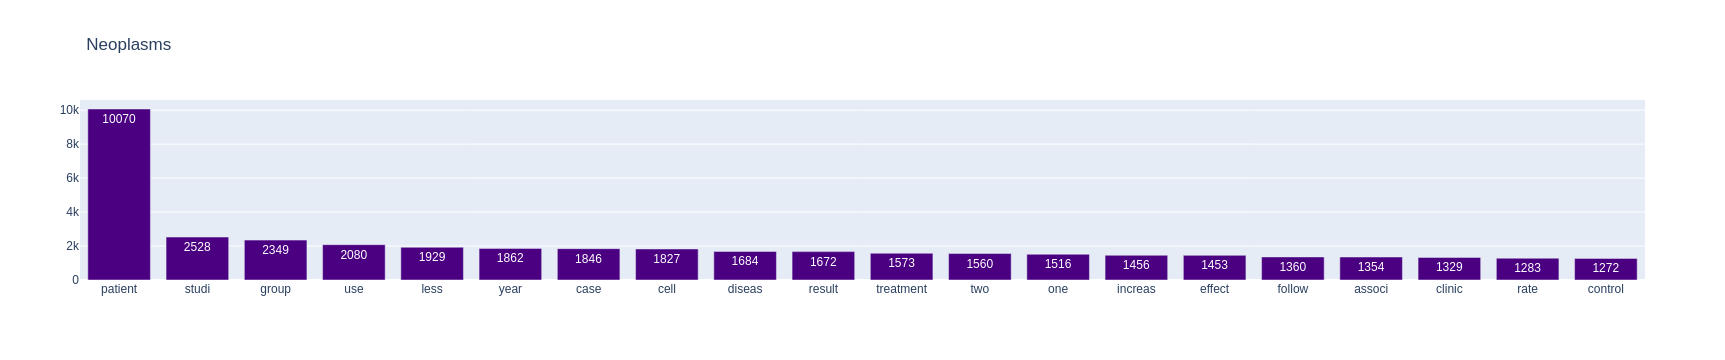

In [81]:
words, frequencies = zip(*top_4_stemming)
fig = visualization_top_word_count(words, frequencies, frequencies, title='Neoplasms', color='indigo', top_n=20)
fig.show()

* __Take common words, evenly distributed in at least 3 classes and in the top 50 will be eliminated__

In [82]:
# Show total commond words on top 50
com_words = find_common_words([top_0_lemma, top_1_lemma, top_2_lemma, top_3_lemma, top_4_lemma])
len(com_words)

39

In [83]:
# Show first 20 words in com_words
limited_rare = {key for key in list(com_words)[:20]}
limited_rare

{'case',
 'cell',
 'clinical',
 'disease',
 'factor',
 'group',
 'le',
 'may',
 'month',
 'one',
 'patient',
 'rate',
 'result',
 'study',
 'therapy',
 'three',
 'treatment',
 'tumor',
 'two',
 'year'}

In [84]:
# Replace common words with empty.

df.lemma_normalize_medical_abstract = df.lemma_normalize_medical_abstract.apply(lambda x: replace_words(x, com_words))

In [85]:
# Create column "lemma_word_count" to check quartile range

df['lemma_word_count'] = df.lemma_normalize_medical_abstract.apply(lambda x: len(x.split(' ')))

In [86]:
df.head()

,condition_label,medical_abstract,normalize_medical_abstract,word_count,stemming_normalize_medical_abstract,lemma_normalize_medical_abstract,lemma_word_count
0,4,Tissue changes around loose prostheses. A cani...,tissue changes around loose prostheses canine ...,92,tissu chang around loos prosthes canin model i...,tissue change around loose prosthesis canine m...,92
1,0,Neuropeptide Y and neuron-specific enolase lev...,neuropeptide neuron specific enolase levels be...,112,neuropeptid neuron specif enolas level benign ...,neuropeptide neuron specific enolase benign m...,113
2,1,"Sexually transmitted diseases of the colon, re...",sexually transmitted diseases colon rectum anu...,157,sexual transmit diseas colon rectum anu challe...,sexually transmitted colon rectum anus challe...,158
3,0,Lipolytic factors associated with murine and h...,lipolytic factors associated murine human canc...,99,lipolyt factor associ murin human cancer cache...,lipolytic murine human cancer cachexia ident...,99
4,2,Does carotid restenosis predict an increased r...,carotid restenosis predict increased risk late...,153,carotid restenosi predict increas risk late sy...,carotid restenosis predict late symptom stro...,167


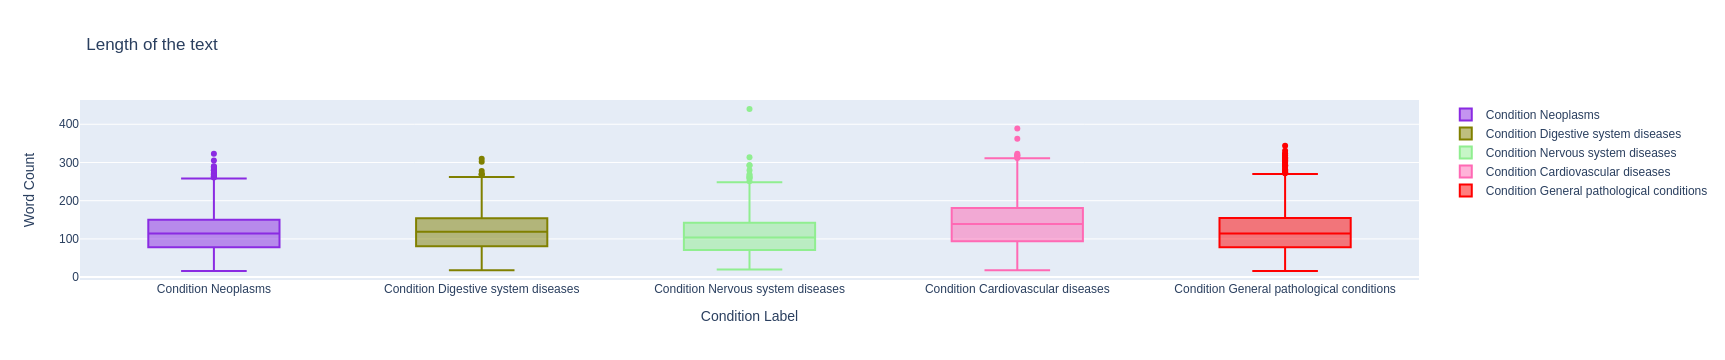

In [87]:
get_quartile_range(df, 'lemma_word_count', [0,1,2,3,4])

* __After implementing the lemmatization method, the overall quartile plot did not change significantly compared to before.__

### Word Cloud

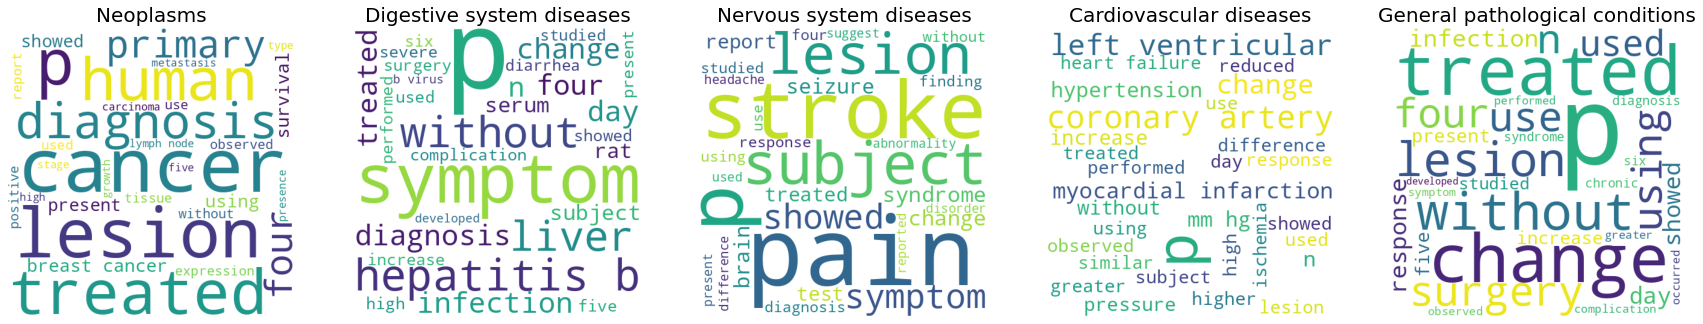

In [88]:

fig, axes = plt.subplots(1, 5, figsize=[30, 30])
for idx, (ax, class_text_clean) in enumerate(zip(axes, [get_clean_text(df['lemma_normalize_medical_abstract'][df['condition_label']==0].tolist()),
                                                        get_clean_text(df['lemma_normalize_medical_abstract'][df['condition_label']==1].tolist()),
                                                        get_clean_text(df['lemma_normalize_medical_abstract'][df['condition_label']==2].tolist()),
                                                        get_clean_text(df['lemma_normalize_medical_abstract'][df['condition_label']==3].tolist()),
                                                        get_clean_text(df['lemma_normalize_medical_abstract'][df['condition_label']==4].tolist())])):
    visualize_wordcloud(class_text_clean, ax, f'{class_mapping[str(idx)]}', max_words=30)

plt.show()

In [89]:
# Updated to add the word "p" to com_words
com_words.update({"p": ''})

## Finally
* The final step involves preprocessing the entire train-test dataset using the functions analyzed earlier.</br>
* The preprocessed data will be stored in two new files to save time during the training and testing of the model, avoiding the repetition of preprocessing steps multiple times.</br>
* The new files are saved with the names **'preprocessed-medical_tc_train.csv'** and **'preprocessed-medical_tc_test.csv'**.

In [90]:
# Read and process data train

train_df = pd.read_csv('../Medical-Abstracts-TC-Corpus/medical_tc_train.csv')
train_df = normalize_special_text(train_df, 'medical_abstract', 'normalize_medical_abstract')
train_df = remove_stopwords(train_df, 'normalize_medical_abstract')
train_df.normalize_medical_abstract = train_df.normalize_medical_abstract.apply(lambda x: stemming_lemma_reprocess(x, type_select='lemma'))
train_df.normalize_medical_abstract = train_df.normalize_medical_abstract.apply(lambda x: replace_words(x, com_words))
train_df.drop('medical_abstract', axis=1, inplace=True)
train_df.rename(columns={'normalize_medical_abstract': 'medical_abstract'}, inplace=True)
train_df['condition_label'] = train_df['condition_label'].astype(int)
train_df.head()

,condition_label,medical_abstract
0,5,tissue change around loose prosthesis canine m...
1,1,neuropeptide neuron specific enolase benign m...
2,2,sexually transmitted colon rectum anus challe...
3,1,lipolytic murine human cancer cachexia ident...
4,3,carotid restenosis predict late symptom stro...


In [91]:
# save training set with new name 'preprocessed-medical_tc_train.csv'
train_df.to_csv('../Medical-Abstracts-TC-Corpus/preprocessed-medical_tc_train.csv', index=False, index_label=False)

In [92]:
# Read and process data test

test_df = pd.read_csv('../Medical-Abstracts-TC-Corpus/medical_tc_test.csv')
test_df = normalize_special_text(test_df, 'medical_abstract', 'normalize_medical_abstract')
test_df = remove_stopwords(test_df, 'normalize_medical_abstract')
test_df.normalize_medical_abstract = test_df.normalize_medical_abstract.apply(lambda x: stemming_lemma_reprocess(x, type_select='lemma'))
test_df.normalize_medical_abstract = test_df.normalize_medical_abstract.apply(lambda x: replace_words(x, com_words))
test_df.drop('medical_abstract', axis=1, inplace=True)
test_df.rename(columns={'normalize_medical_abstract': 'medical_abstract'}, inplace=True)
test_df['condition_label'] = test_df['condition_label'].astype(int)
test_df.head()

,condition_label,medical_abstract
0,3,obstructive sleep apnea following topical orop...
1,5,neutrophil function pyogenic infection bone ma...
2,5,phase ii combined methotrexate teniposide inf...
3,1,flow cytometric dna analysis parathyroid impl...
4,4,paraneoplastic vasculitic neuropathy treatable...


In [93]:
# save training set with new name 'preprocessed-medical_tc_test.csv'

test_df.to_csv('../Medical-Abstracts-TC-Corpus/preprocessed-medical_tc_test.csv', index=False, index_label=False)

In [113]:
a = 'bert-base-uncased-False-fcl-False.pth'.replace('.pth','')

b = a.split('-')[::][-3:]
b

['False', 'fcl', 'False']

In [ ]:
n = a.split('-')[::]